<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/PCA_of_Cifar_10_And_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Examples of PCA and Random Forest followed from Tensorflow website
# Optimization Loop for n_compontents written by me.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 10s 0us/step


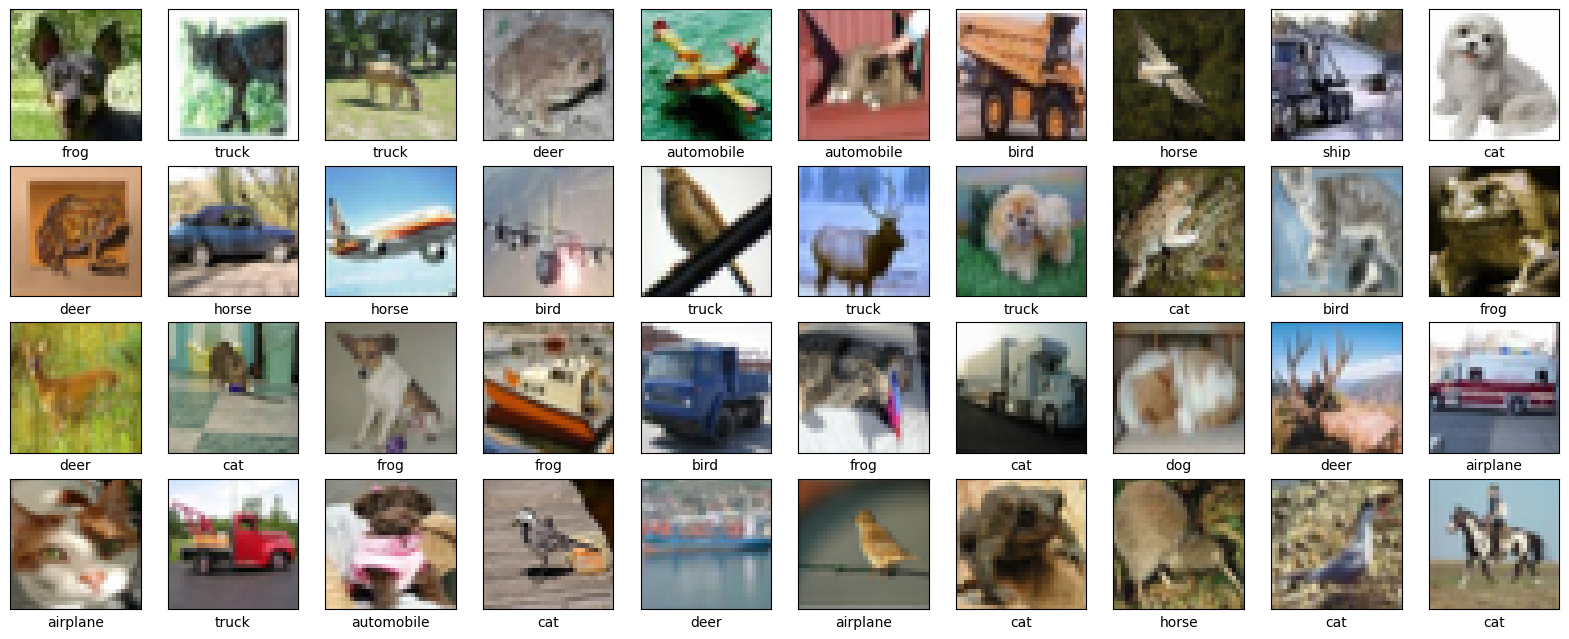

In [4]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+2500])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels.reshape(10000,)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

Applying PCA

In [6]:
import sklearn
from sklearn.decomposition import PCA

In [7]:
k = 200
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

Build a Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [9]:
RandomForest_model = RandomForestClassifier(n_estimators=30, random_state=7)
RandomForest_model.fit(x_train_transformed, y_train)

RandomForestClassifier(n_estimators=30, random_state=7)

In [10]:
y_hat = RandomForest_model.predict(x_test_transformed)

In [11]:
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = RandomForest_model.score(x_test_transformed,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[496  44  72  60  30  25  24  31 170  48]
 [ 63 494  29  48  36  45  30  30  78 147]
 [130  42 272  90 156  84 109  63  34  20]
 [ 62  63 105 233  77 184 119  60  42  55]
 [ 66  33 176  80 315  52 153  64  41  20]
 [ 67  74 112 186  79 280  72  64  35  31]
 [ 36  49 139  96 129  64 403  39  26  19]
 [ 57  78  80 102 109  99  42 319  35  79]
 [145  92  24  48  31  44  17  31 499  69]
 [105 247  30  43  20  46  26  66  74 343]]
Accuracy: 36.54%


Optimize the Number of N_estimator in our Random Forest

In [16]:
range_of_n = 44
accuacy_index_for_Random_Forest_Classifier = tf.zeros(range_of_n).numpy()
N_component_idx_for_Random_Forest_Classifier = tf.zeros(range_of_n).numpy()
temp_state = 0
counter = 0
for i in range(20,1120,50):
  counter = counter + 1
  RandomForest_model = RandomForestClassifier(n_estimators=i, random_state=7)
  RandomForest_model.fit(x_train_transformed, y_train)
  acc = RandomForest_model.score(x_test_transformed,y_test)
  accuacy_index_for_Random_Forest_Classifier[counter-1] = acc
  N_component_idx_for_Random_Forest_Classifier[counter-1] = i
  print(i)
  if acc > temp_state:
    best_number_N_classifiers = i
    temp_state =acc

20
70
120
170
220
270
320
370
420
470
520
570
620
670
720
770
820
870
920
970
1020
1070
1120
1170
1220


KeyboardInterrupt: ignored

1221


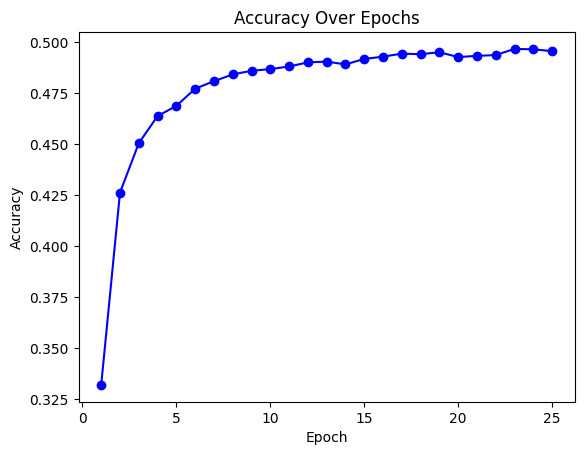

In [20]:
print(best_number_N_classifiers)

# Plot the vector
plt.plot(np.arange(1, len(accuacy_index_for_Random_Forest_Classifier[0:25])+1), accuacy_index_for_Random_Forest_Classifier[0:25], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

# Show the plot
plt.show()

In [21]:
RandomForest_model = RandomForestClassifier(n_estimators=best_number_N_classifiers, random_state=7)
RandomForest_model.fit(x_train_transformed, y_train)
y_hat = RandomForest_model.predict(x_test_transformed)

In [22]:
Cmat = confusion_matrix(y_test, y_hat)
acc = RandomForest_model.score(x_test_transformed,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[565  44  44  24  24  19  29  20 164  67]
 [ 28 605  12  28  10  25  24  29  68 171]
 [104  31 316  78 144  72 126  47  49  33]
 [ 41  46  64 285  54 204 125  53  45  83]
 [ 52  16 102  69 430  47 155  70  34  25]
 [ 24  34  71 178  60 406  84  67  37  39]
 [  9  35  63  50  88  52 624  18  19  42]
 [ 40  53  33  67  80  90  40 460  37 100]
 [ 88  79  12  19  13  38  11  13 647  80]
 [ 45 179   9  23  11  31  29  41  69 563]]
Accuracy: 49.01%


In [23]:
import numpy as np
import pandas as pd
from google.colab import drive

In [24]:
# Mount Google DriveN_component_idx_for_Random_Forest_Classifier
drive.mount('/content/drive')

# Save the array to a CSV file
csv_filename = '/content/drive/MyDrive/my_array_Random_Forest.csv'
np.savetxt(csv_filename, accuacy_index_for_Random_Forest_Classifier, delimiter=',')
csv_filename = '/content/drive/MyDrive/my_array_Random_Forest2.csv'
np.savetxt(csv_filename, N_component_idx_for_Random_Forest_Classifier, delimiter=',')
# Optional: Load the CSV file back into a variable
#loaded_array = np.loadtxt(csv_filename, delimiter=',')

Mounted at /content/drive
